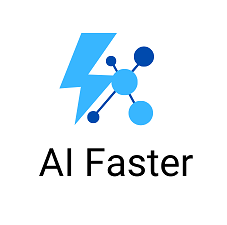
### Một bài tập để ôn lại kiến thức PLA (Perceptron learning algorithm)

**Viết một chương trình sử dụng PLA để phân loại hai lớp dữ liệu tuyến tính. Chương trình của bạn nên có các chức năng sau:**

> 1. Tạo dữ liệu mô phỏng: Hãy tạo ra một tập dữ liệu mô phỏng gồm hai lớp dữ liệu tuyến tính, mỗi lớp chứa một số điểm dữ liệu. Đảm bảo rằng các điểm dữ liệu trong hai lớp này có thể được phân loại bằng một đường thẳng mặt phẳng hoặc siêu phẳng tuyến tính.

> 2. Hiển thị dữ liệu: Vẽ đồ thị để hiển thị dữ liệu và biểu diễn các lớp dữ liệu bằng màu sắc khác nhau.

> 3. Huấn luyện PLA: Sử dụng PLA để tìm siêu phẳng tuyến tính (đối với bài này chỉ yêu cầu làm không gian 2 chiều) phân chia hai lớp dữ liệu. Bắt đầu bằng một siêu phẳng ngẫu nhiên và áp dụng thuật toán PLA để điều chỉnh siêu phẳng này cho đến khi tìm được siêu phẳng phân chia hai lớp dữ liệu.

> 4. Hiển thị kết quả: Vẽ đồ thị để hiển thị siêu phẳng phân chia hai lớp dữ liệu và các điểm dữ liệu đã được phân loại.

*Thật tuyệt vời nếu bạn hoàn thành nó trước 21h ngày mai*

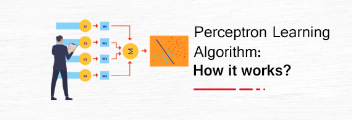
> **Bài làm**

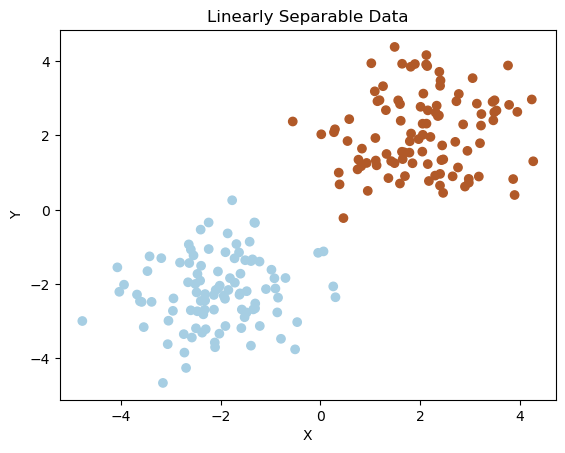

PLA converged in 2 iterations


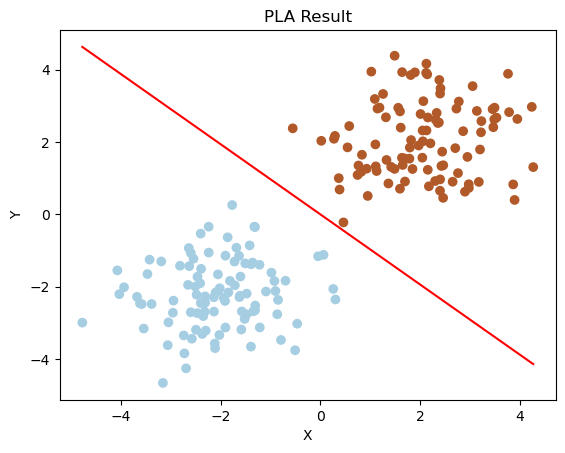

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Tạo dữ liệu mô phỏng
def generate_data():
    np.random.seed(0)
    num_samples = 100
    class_mean = 2

    # Tạo lớp dữ liệu thứ nhất
    class_1_x = np.random.randn(num_samples) + class_mean
    class_1_y = np.random.randn(num_samples) + class_mean

    # Tạo lớp dữ liệu thứ hai
    class_2_x = np.random.randn(num_samples) - class_mean
    class_2_y = np.random.randn(num_samples) - class_mean

    # Gộp hai lớp dữ liệu lại
    X = np.vstack((np.concatenate((class_1_x, class_2_x)),
                   np.concatenate((class_1_y, class_2_y)))).T
    y = np.concatenate((np.ones(num_samples), -np.ones(num_samples)))
    return X, y

# Hiển thị dữ liệu
def plot_data(X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Linearly Separable Data')
    plt.show()

# Huấn luyện PLA
def train_pla(X, y):
    num_samples, num_features = X.shape
    w = np.zeros(num_features)  # Khởi tạo trọng số ban đầu
    misclassified = True
    num_iterations = 0

    while misclassified:
        misclassified = False

        for i in range(num_samples):
            if np.sign(np.dot(X[i], w)) != y[i]:
                w += y[i] * X[i]  # Cập nhật trọng số
                misclassified = True

        num_iterations += 1

    print(f'PLA converged in {num_iterations} iterations')
    return w

# Hiển thị kết quả
def plot_result(X, y, w):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('PLA Result')

    # Vẽ siêu phẳng phân chia hai lớp dữ liệu
    x_line = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
    y_line = -(w[0] * x_line) / w[1]
    plt.plot(x_line, y_line, 'r')

    plt.show()

# Chạy chương trình chính
if __name__ == '__main__':
    # Tạo dữ liệu mô phỏng
    X, y = generate_data()

    # Hiển thị dữ liệu
    plot_data(X, y)

    # Huấn luyện PLA
    w = train_pla(X, y)

    # Hiển thị kết quả
    plot_result(X, y, w)


In [2]:
print(X)

[[ 3.76405235  2.14404357]
 [ 2.40015721  3.45427351]
 [ 2.97873798  2.76103773]
 [ 4.2408932   2.12167502]
 [ 3.86755799  2.44386323]
 [ 1.02272212  2.33367433]
 [ 2.95008842  3.49407907]
 [ 1.84864279  1.79484174]
 [ 1.89678115  2.3130677 ]
 [ 2.4105985   1.14590426]
 [-4.55298982 -1.84505257]
 [-1.3463814  -1.62183748]
 [-1.1355638  -2.88778575]
 [-2.74216502 -3.98079647]
 [ 0.26975462 -2.34791215]
 [-3.45436567 -1.84365103]
 [-1.95424148 -0.76970932]
 [-2.18718385 -0.79762015]
 [-0.46722079 -2.38732682]
 [-0.53064123 -2.30230275]]


[20, 52, 15, 66, 33, 41, 75, 18, 39, 74, 4, 95, 9, 90, 2, 67, 38, 58, 11, 97, 7, 48, 49, 79, 29, 77, 33, 67, 3, 39, 50, 4, 91, 11, 39, 75, 4, 80, 22, 42, 68, 18, 29, 86, 2, 51, 33, 97, 19, 13, 62, 39, 49, 80, 4, 52, 48, 29, 52, 11, 49, 74, 29, 97, 16, 52, 6, 29, 52, 33, 97, 40, 49, 52, 6, 49, 62, 33, 52, 3, 49, 97, 18, 39, 97, 10]


<IPython.core.display.Javascript object>


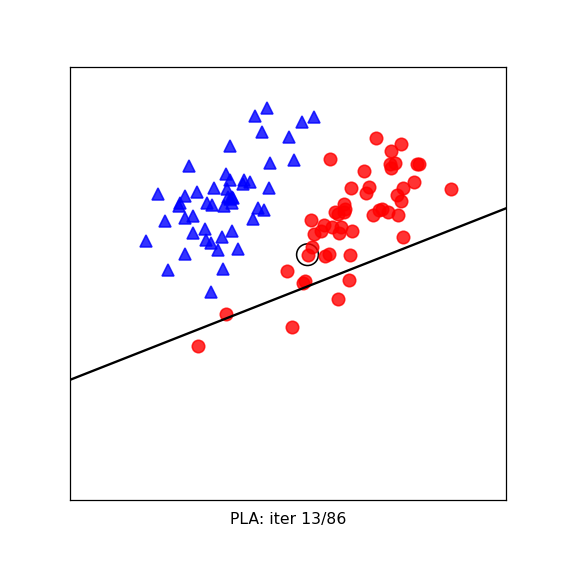

MovieWriter imagemagick unavailable; using Pillow instead.


Done


In [5]:
# generate data
# list of points
%matplotlib notebook
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(2)

means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 50
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T

X = np.concatenate((X0, X1), axis = 1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)
# Xbar 
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)

# print(X)

# print('---')
# print(y)

def h(w, x):    
    return np.sign(np.dot(w.T, x))

def has_converged(X, y, w):    
    return np.array_equal(h(w, X), y) 

def perceptron(X, y, w_init):
    w = [w_init]  # Danh sách lưu trữ các trọng số sau mỗi lần cập nhật
    N = X.shape[1]  # Số lượng điểm dữ liệu
    d = X.shape[0]  # Số chiều của dữ liệu
    misclassified_points = []  # Danh sách lưu trữ các điểm dữ liệu bị phân loại sai
    misclassified = True
    while misclassified:
        misclassified = False  # Biến kiểm tra xem có điểm dữ liệu bị phân loại sai hay không

        # Trộn ngẫu nhiên dữ liệu
        mix_id = np.random.permutation(N)

        for i in range(N):
            xi = X[:, mix_id[i]].reshape(d, 1)  # Điểm dữ liệu hiện tại
            yi = y[0, mix_id[i]]  # Nhãn tương ứng với điểm dữ liệu

            if h(w[-1], xi)[0] != yi:  # Kiểm tra xem điểm dữ liệu có bị phân loại sai hay không
                misclassified_points.append(mix_id[i])  # Thêm điểm dữ liệu vào danh sách bị phân loại sai
                w_new = w[-1] + yi * xi  # Cập nhật trọng số
                w.append(w_new)  # Thêm trọng số mới vào danh sách
                misclassified = True  # Đánh dấu là có điểm dữ liệu bị phân loại sai

        if not misclassified:  # Nếu không còn điểm dữ liệu nào bị phân loại sai, thoát khỏi vòng lặp
            break

    return (w, misclassified_points)


d = X.shape[0]
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X, y, w_init)
print(m)
# print(w)
# print(len(w))

def draw_line(w):
    w0, w1, w2 = w[0], w[1], w[2]
    if w2 != 0:
        x11, x12 = -100, 100
        return plt.plot([x11, x12], [-(w1*x11 + w0)/w2, -(w1*x12 + w0)/w2], 'k')
    else:
        x10 = -w0/w1
        return plt.plot([x10, x10], [-100, 100], 'k')

## Visualization
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation 

def viz_alg_1d_2(w):
    it = len(w)    
    fig, ax = plt.subplots(figsize=(5, 5))  
    
    def update(i):
        ani = plt.cla()
        #points
        ani = plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 8, alpha = .8)
        ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize = 8, alpha = .8)
        ani = plt.axis([0 , 6, -2, 4])
        i2 =  i if i < it else it-1
        ani = draw_line(w[i2])
        if i < it-1:
            # draw one  misclassified point
            circle = plt.Circle((X[1, m[i]], X[2, m[i]]), 0.15, color='k', fill = False)
            ax.add_artist(circle)
        # hide axis 
        cur_axes = plt.gca()
        cur_axes.axes.get_xaxis().set_ticks([])
        cur_axes.axes.get_yaxis().set_ticks([])

        label = 'PLA: iter %d/%d' %(i2, it-1)
        ax.set_xlabel(label)
        return ani, ax 
        
    anim = FuncAnimation(fig, update, frames=np.arange(0, it + 2), interval=1000)
    # save 
    anim.save('pla_vis.gif', dpi = 100, writer = 'imagemagick')
    plt.show()
    
viz_alg_1d_2(w)
print('Done')

In [4]:
print(X)

[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.   